In [1]:
import os
import time
import random
import torch
import mrcfile
import numpy as np
from torch import nn
from math import ceil
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from torch import FloatTensor as FT
from torch.autograd import Variable as V
from concurrent.futures import ThreadPoolExecutor
from utils import *
from matplotlib.colors import ListedColormap
rawData = "/home/tyche/paddle_SN2N/raw_data/"
Datasets = "/home/tyche/paddle_SN2N/datasets/"


def get_all_files(directory):
    file_list = list()
    n_files = 0
    for file in os.listdir(directory):
        file_list.append(f"{directory}/{file}")
        n_files += 1
    return file_list, n_files

In [2]:
files, n_files = get_all_files(f"{rawData}/..")
print(files, n_files)
print(len(files))

['/home/tyche/paddle_SN2N/raw_data//../utils.py', '/home/tyche/paddle_SN2N/raw_data//../datasets', '/home/tyche/paddle_SN2N/raw_data//../.gitignore', '/home/tyche/paddle_SN2N/raw_data//../__pycache__', '/home/tyche/paddle_SN2N/raw_data//../.git', '/home/tyche/paddle_SN2N/raw_data//../test.ipynb', '/home/tyche/paddle_SN2N/raw_data//../train.py', '/home/tyche/paddle_SN2N/raw_data//../raw_data'] 8
8


In [3]:
kernel = torch.tensor([[[[0, 1], [1, 1]], [[1, 1], [1, 1]]],
                       [[[1, 0], [1, 1]], [[1, 1], [1, 1]]],
                       [[[1, 1], [0, 1]], [[1, 1], [1, 1]]],
                       [[[1, 1], [1, 0]], [[1, 1], [1, 1]]],
                       [[[1, 1], [1, 1]], [[0, 1], [1, 1]]],
                       [[[1, 1], [1, 1]], [[1, 0], [1, 1]]],
                       [[[1, 1], [1, 1]], [[1, 1], [0, 1]]],
                       [[[1, 1], [1, 1]], [[1, 1], [1, 0]]],])
kernel.shape

torch.Size([8, 2, 2, 2])

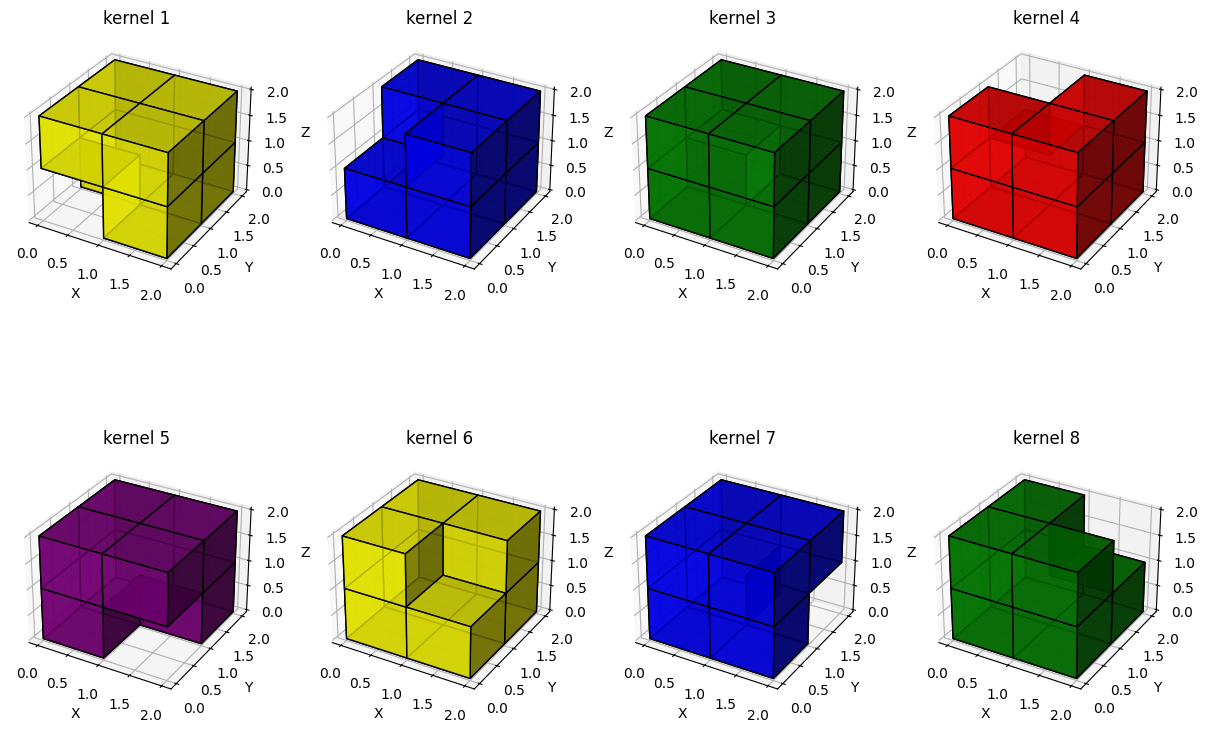

In [4]:
data = np.random.choice([0, 1], size=(5, 5, 5))
colors = ['yellow', 'blue', 'green', 'red', 'purple']
cmap = ListedColormap(colors)
fig, axes = plt.subplots(2, 4, figsize=(15, 10), subplot_kw={'projection': '3d'})
axes = axes.flatten()
for i in range(min(8, kernel.shape[0])):  # 最多显示6个子图
    ax = axes[i]
    ax.voxels(kernel[i], facecolors=cmap(i%len(colors)), edgecolor='k', alpha=0.8)
    ax.set_title(f'kernel {i+1}')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
plt.show()

In [5]:
x = torch.randn(1, 1, 5, 5)  # 输入张量 [批次大小, 通道数, 高度, 宽度]

kernel = torch.tensor([[[[1, 0], [0, 1]], [[0, 1], [1, 0]]], 
                       [[[0, 1], [1, 0]], [[1, 0], [0, 1]]]])

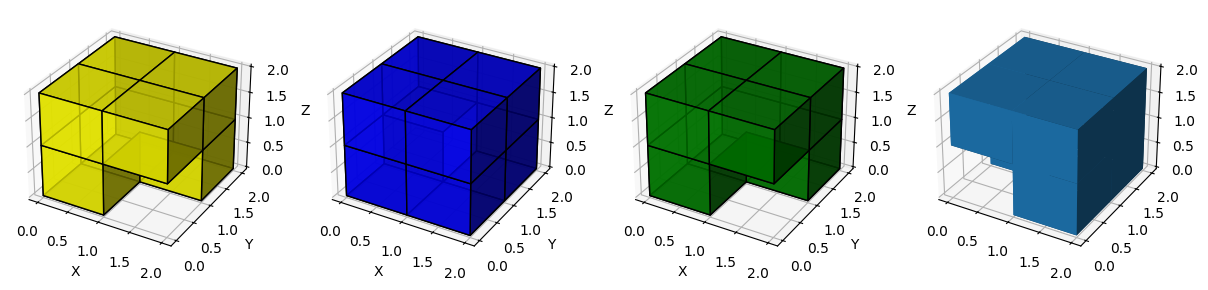

tensor([[[1, 5],
         [3, 7]],

        [[0, 4],
         [2, 6]]])

In [17]:
x = torch.arange(8).view(2, 2, 2)
dims = [[0, 1], [1, 2], [0, 2]]
fig, axes = plt.subplots(1, 4, figsize=(15, 10), subplot_kw={'projection': '3d'})
axes = axes.flatten()
for i in range(3):  # 最多显示6个子图
    ax = axes[i]
    ax.voxels(torch.rot90(x, 1, dims[i]), facecolors=cmap(i%len(colors)), edgecolor='k', alpha=0.8)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
axes[3].voxels(x)
plt.show()
torch.rot90(x, 1, [0, 2])
